[*********************100%***********************]  1 of 1 completed


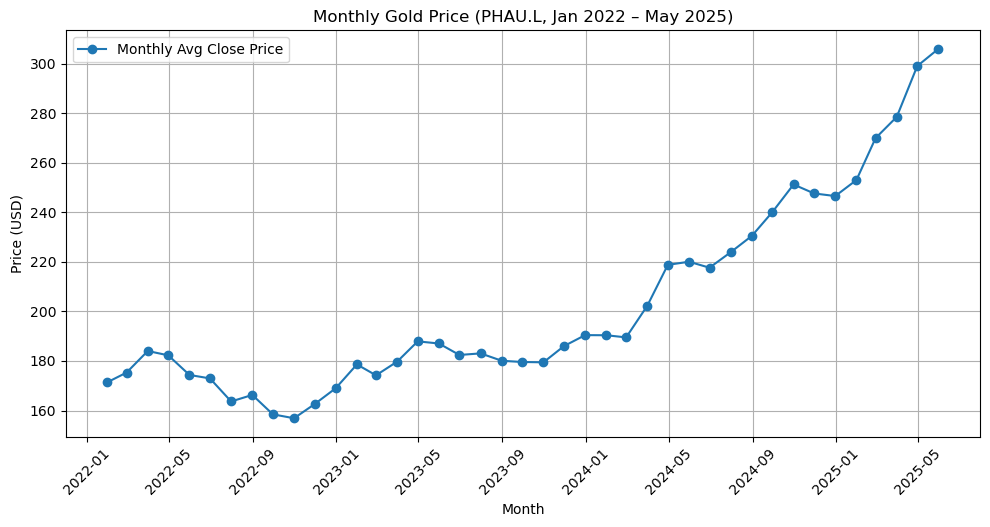

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download data from a Europe-listed gold ETF (e.g., PHAU.L on the LSE)
gold = yf.download("PHAU.L", start="2022-01-01", end="2025-06-02")

# Check if data was retrieved
if gold.empty:
    raise ValueError("Failed to retrieve data. Check the ticker or internet connection.")

# Keep only 'Open' and 'Close' columns
gold = gold[['Open', 'Close']]

# Resample to monthly frequency using mean
gold = gold.resample('ME').mean()

# Save to CSV
gold.to_csv("gold_monthly_prices.csv")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(gold.index, gold['Close'], marker='o', label='Monthly Avg Close Price')
plt.title('Monthly Gold Price (PHAU.L, Jan 2022 – May 2025)')
plt.xlabel('Month')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [19]:
import pandas as pd
gold = pd.read_csv('C:/Users/duoxa/Desktop/project_Data_Science/gold_monthly_prices.csv',skiprows=2)


In [23]:

# Convert 'Date' column to datetime
gold['Date'] = pd.to_datetime(gold['Date'])

# Set 'Date' as the index
gold.set_index('Date', inplace=True)


In [25]:
# Rename columns to remove "Price" or other redundant terms
gold.columns = ['Open', 'Close']

gold.head()

,Open,Close
Date,,
2022-01-31,171.487501,171.437251
2022-02-28,175.227001,175.318500
2022-03-31,183.832174,184.026957
2022-04-30,182.412632,182.267105
2022-05-31,174.360477,174.356429


In [27]:
gold.tail()

,Open,Close
Date,,
2025-01-31,252.381364,253.000452
2025-02-28,270.031001,269.903001
2025-03-31,277.806668,278.471905
2025-04-30,299.534003,298.980998
2025-05-31,305.823999,305.931500


In [29]:
print(gold.info())
print(gold.describe())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2022-01-31 to 2025-05-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    41 non-null     float64
 1   Close   41 non-null     float64
dtypes: float64(2)
memory usage: 984.0 bytes
None
             Open       Close
count   41.000000   41.000000
mean   202.678333  202.693551
std     39.261521   39.291761
min    156.891906  156.890952
25%    175.227001  175.318500
50%    186.014546  185.991365
75%    223.422609  223.872827
max    305.823999  305.931500


In [33]:
print(gold.corr())


           Open     Close
Open   1.000000  0.999976
Close  0.999976  1.000000


In [35]:
gold['Price_Change'] = gold['Close'].diff()
gold['Pct_Change'] = gold['Close'].pct_change() * 100

print(gold[['Close', 'Price_Change', 'Pct_Change']].tail())


                 Close  Price_Change  Pct_Change
Date                                            
2025-01-31  253.000452      6.474201    2.626171
2025-02-28  269.903001     16.902549    6.680838
2025-03-31  278.471905      8.568904    3.174809
2025-04-30  298.980998     20.509093    7.364870
2025-05-31  305.931500      6.950502    2.324730


In [37]:
from statsmodels.tsa.stattools import adfuller

# Drop missing values (if any)
gold_close= gold['Close'].dropna()

# Run the ADF test
result = adfuller(gold_close)

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: 4.102909579107716
p-value: 1.0
Critical Value (1%): -3.6699197407407405
Critical Value (5%): -2.9640707407407407
Critical Value (10%): -2.621171111111111


✅ Conclusion:
Your monthly gold price series is non-stationary.

➡️ It has a trend over time and cannot be used directly in ARIMA or forecasting models.

In [39]:
# First-order differencing
diff_close = gold_close.diff().dropna()

# ADF test on differenced series
from statsmodels.tsa.stattools import adfuller

result_diff = adfuller(diff_close)
print('ADF Statistic (1st Diff):', result_diff[0])
print('p-value:', result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic (1st Diff): -4.253893622143944
p-value: 0.0005333616745801759
Critical Value (1%): -3.610399601308181
Critical Value (5%): -2.939108945868946
Critical Value (10%): -2.6080629651545038


📌 Interpretation:
The ADF statistic (-4.25) is less than all the critical values.

The p-value (0.00053) is much less than 0.05.

✅ Conclusion: After first-order differencing, the gold Close prices are now stationary.



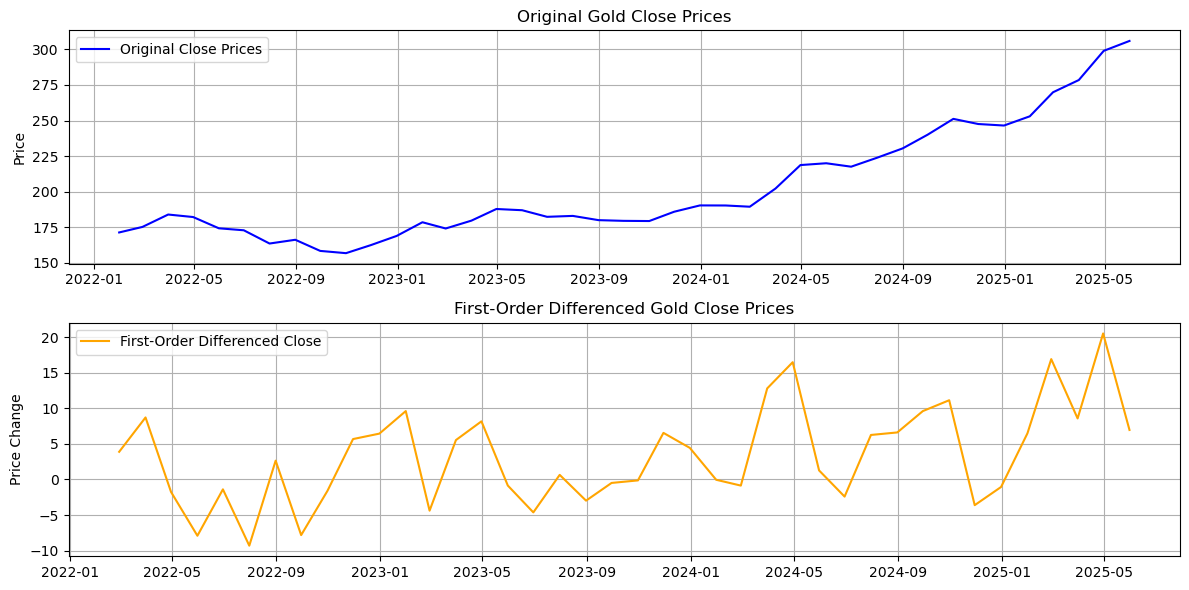

In [45]:
import matplotlib.pyplot as plt

# Plot original and differenced series
plt.figure(figsize=(12, 6))

# Original Close price series
plt.subplot(2, 1, 1)
plt.plot(gold_close, label='Original Close Prices', color='blue')
plt.title('Original Gold Close Prices')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# First-order differenced Close price series
plt.subplot(2, 1, 2)
plt.plot(diff_close, label='First-Order Differenced Close', color='orange')
plt.title('First-Order Differenced Gold Close Prices')
plt.ylabel('Price Change')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#using auto-arima function 

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=276.296, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=273.667, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=274.300, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=272.630, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=270.163, Time=0.07 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=270.192, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=268.459, Time=0.04 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=270.692, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=268.714, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=267.217, Time=0.06 sec
 A

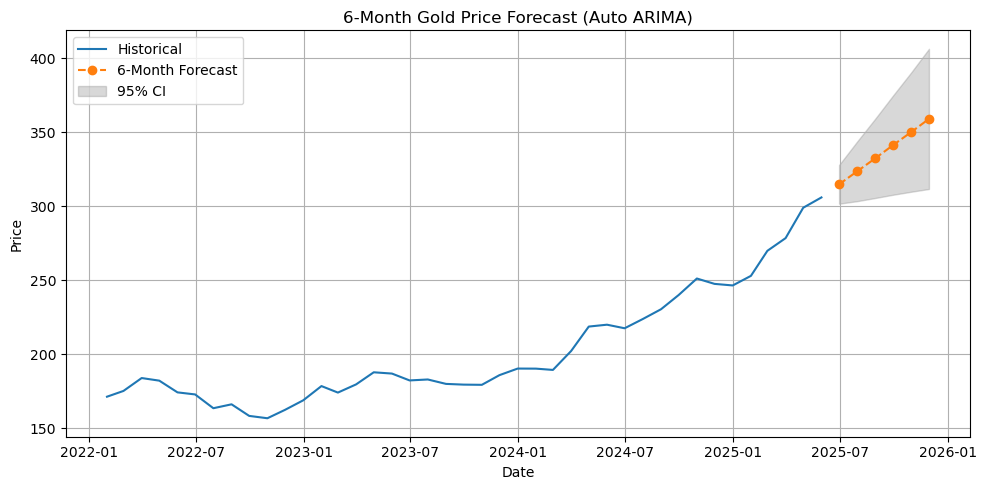

In [55]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Fit the best ARIMA model using auto_arima
auto_model = auto_arima(
    gold_close,
    seasonal=False,        # Set to True if you suspect seasonality
    stepwise=True,         # Faster search
    suppress_warnings=True,
    trace=True             # Shows progress
)

# Summary of the best model found
print(auto_model.summary())

# Forecast next 6 months
n_periods = 6
forecast, conf_int = auto_model.predict(n_periods=n_periods, return_conf_int=True)

# Create date index for forecast
forecast_index = pd.date_range(start=gold_close.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='ME')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(gold_close, label='Historical')
plt.plot(forecast_index, forecast, label='6-Month Forecast', linestyle='--', marker='o')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3, label='95% CI')
plt.title('6-Month Gold Price Forecast (Auto ARIMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
# Create a DataFrame for forecast
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecast': forecast,
    'Lower_95_CI': conf_int[:, 0],
    'Upper_95_CI': conf_int[:, 1]
})

# Set Date as index (optional)
forecast_df.set_index('Date', inplace=True)

# Save to CSV
forecast_df.to_csv('gold_6_month_forecast.csv')

print("Forecast saved to 'gold_6_month_forecast.csv'")


Forecast saved to 'gold_6_month_forecast.csv'


- The original series was non-stationary.
- First-order differencing made it stationary.
- `auto_arima` selected ARIMA(0,2,1) as the best model.
- The model fits well and produced a 6-month forecast with confidence intervals.
- The forecast has been saved for further analysis or presentation.


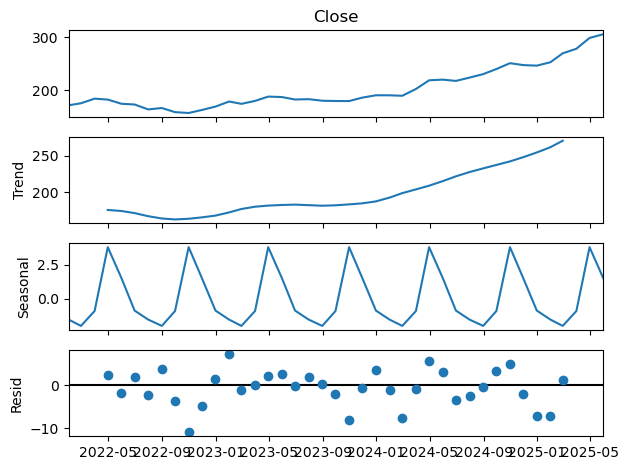

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(gold_close, model='additive', period=6)
decomposition.plot()
plt.show()


📈 2. Trend
This line smooths out monthly noise to show the underlying long-term movement.

The trend appears mostly upward, peaking around early 2023, then dips, and rises again.

✅ Interpretation:

Indicates a general increase in gold prices over time, with a small dip in the middle.

Reflects possible economic cycles or global events influencing gold demand/supply.

